In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
sns.set(style="darkgrid")
%matplotlib inline

/Users/chandler/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [60]:
data = pd.read_excel('returns_OCT.xlsx', index_col='time')
data.head()

,BTC,ETH,XRP,BCH,LTC,DASH,XEM,BCC,NEO,XMR,...,HTML5,EQT,CURE,ZRC,IOP,XTO,NOTE,DYN,TRUST,ABY
time,,,,,,,,,,,,,,,,,,,,,
2017-08-20 17:00:00,4108.62,0.07197,0.000039,0.1712,0.01138,0.07020,0.000068,0.843,0.009480,0.01360,...,1.000000e-08,0.00022,0.000069,0.0,0.000158,0.000012,0.00001,0.000495,0.000017,0.000002
2017-08-20 18:00:00,4138.14,0.07157,0.000038,0.1713,0.01128,0.06923,0.000067,0.843,0.009233,0.01320,...,2.000000e-08,0.00022,0.000069,0.0,0.000161,0.000012,0.00001,0.000481,0.000017,0.000002
2017-08-20 19:00:00,4147.50,0.07143,0.000038,0.1822,0.01124,0.07112,0.000066,0.887,0.009330,0.01337,...,2.000000e-08,0.00022,0.000069,0.0,0.000161,0.000012,0.00001,0.000460,0.000017,0.000002
2017-08-20 20:00:00,4122.02,0.07158,0.000039,0.1840,0.01133,0.07087,0.000067,0.887,0.009361,0.01337,...,2.000000e-08,0.00022,0.000068,0.0,0.000158,0.000012,0.00001,0.000475,0.000017,0.000002
2017-08-20 21:00:00,4134.96,0.07177,0.000039,0.1785,0.01128,0.07210,0.000067,0.887,0.009300,0.01333,...,2.000000e-08,0.00022,0.000069,0.0,0.000157,0.000012,0.00001,0.000475,0.000017,0.000002


### Using a 12 hour time period for returns

In [63]:
#using 12 hour time periods aka 12 hour returns
p_len = 12
df = data.pct_change(p_len)
df = df.iloc[p_len:]

df = df.loc[:,(df.applymap(lambda x: x < 5).all(axis=0) == True)]
df.head()

,BTC,ETH,XRP,BCH,LTC,DASH,XEM,NEO,XMR,ETC,...,BITB,EXCL,HTML5,EQT,CURE,IOP,NOTE,DYN,TRUST,ABY
time,,,,,,,,,,,,,,,,,,,,,
2017-08-21 05:00:00,-0.022584,0.081423,0.002857,0.007593,-0.000879,0.016809,-0.017665,-0.050527,-0.020588,0.003791,...,0.161765,-0.214703,1.0,0.0,-0.004367,-0.012698,0.045045,-0.021216,-0.122106,-0.021053
2017-08-21 06:00:00,-0.032604,0.118066,0.019428,-0.016929,0.008865,0.028023,-0.018125,-0.025236,0.001515,0.028690,...,-0.107143,-0.084021,0.0,0.0,-0.021837,-0.008706,0.031697,-0.015602,-0.123529,-0.005376
2017-08-21 07:00:00,-0.029767,0.100378,0.026323,-0.061471,0.009786,0.002531,-0.009507,-0.076956,0.279731,0.025283,...,-0.316327,0.174538,0.0,0.0,0.005654,-0.032960,0.007960,0.027808,-0.131030,-0.031579
2017-08-21 08:00:00,-0.013811,0.094719,0.009595,-0.089674,-0.007061,0.008607,-0.046082,-0.067407,0.540763,0.021043,...,-0.244444,0.111232,0.0,0.0,0.025136,-0.017067,-0.018627,-0.020842,-0.201734,-0.021277
2017-08-21 09:00:00,-0.014801,0.086387,-0.014960,-0.115966,-0.003546,-0.013870,-0.039839,-0.080645,0.574644,0.006497,...,-0.116883,0.077006,0.0,0.0,0.003777,-0.015277,-0.031220,0.010526,-0.219298,-0.010811


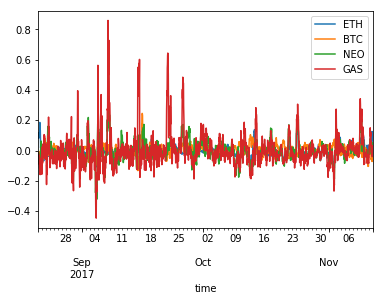

In [161]:
# looks too wild so need to adjust for the volatility
df[['ETH', 'BTC', 'NEO', 'GAS']].plot() 

#### Adjust returns for volatility 

rationale is getting apples to apples returns, so want the smartest or vol adjusted return.

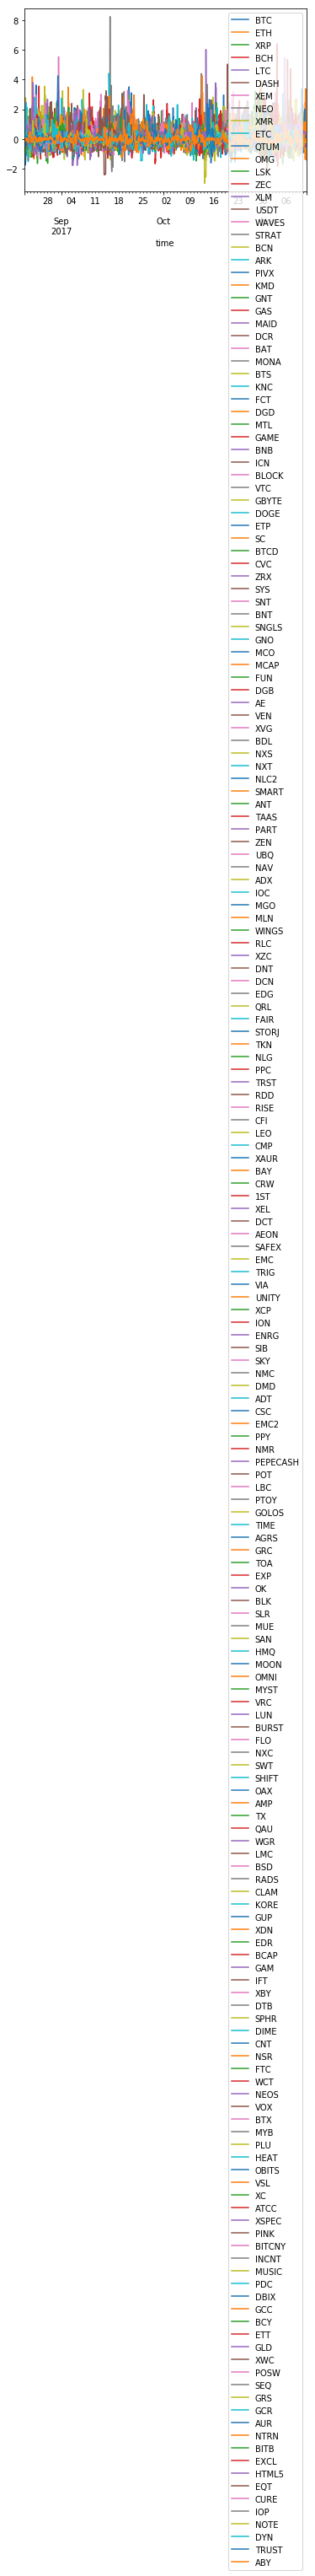

In [162]:
vol_adj = np.sqrt(p_len) * df.std()

# df_norm = (df - df.mean()) / (df.max() - df.min())
df_vol = (df / vol_adj)
df_vol.plot()

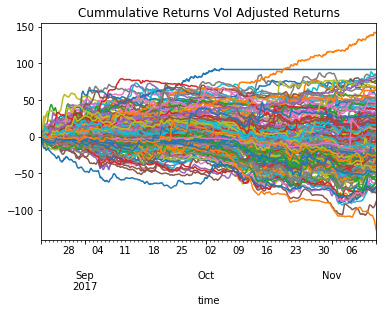

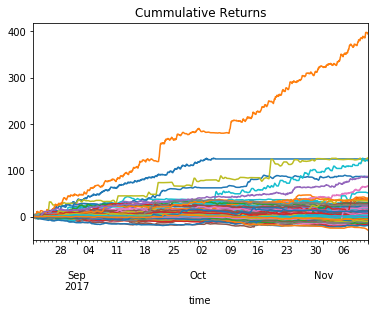

In [168]:
df_vol.cumsum().plot(legend=None, title='Cummulative Returns Vol Adjusted Returns')
df.cumsum().plot(legend=None, title='Cummulative Returns')


### Quick check to see if there is any Alpha to be had in selecting 'alt coins' 

result is there is some on a pure active return basis

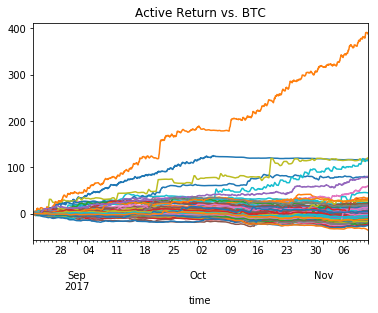

In [201]:
BTC = df.BTC
df_alpha = df.sub(BTC.squeeze(),axis=0).dropna()


df_alpha.cumsum().plot(legend=None, title='Active Return vs. BTC')

#### Now a check on resample

not sure what is going on here or why it is not working 

In [58]:
p_len = 1
df_hour = data.pct_change(p_len)
df_hour = df_hour.iloc[p_len:]
# 
df_day = df_hour.resample('D').agg(lambda x: x[-1] / x[1] - 1)



AttributeError: 'module' object has no attribute 'pct_change'

#### Just using some moving correlations

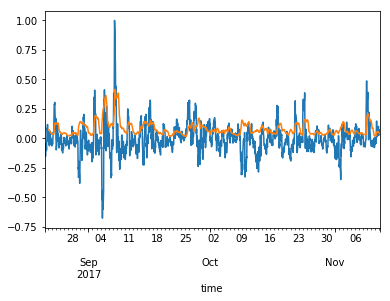

In [235]:
coin = 'NEO'
#maxim = df[coin].cumsum().max()
maxret = df[coin].max()
maxvol = df[coin].rolling(24).std().max()
#df[coin].cumsum().apply(lambda x: x / maxim).plot()
df[coin].apply(lambda x: x / maxret).plot()
df[coin].rolling(24).std().apply(lambda x: x / maxret).plot()


In [268]:
#
melted_df = pd.melt(df, id_vars=index, var_name='Security', value_name='Price')
melted_df['Dummy'] = 0
sns.tsplot(melted_df, unit='Dummy', condition='Security', value='Price', ax=ax)


NameError: name 'index' is not defined

#### Model Time

In [272]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

/Users/chandler/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [296]:
n = len(df)
train = df.BTC[:int(.75*n)]
test = df.BTC[int(.75*n):]


In [295]:
model = sm.tsa.ARIMA(train, (1, 0, 0)).fit()

predictions = model.predict(
    test.index[0],
    test.index[-1],
    dynamic=True, 
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()

('Mean absolute error: ', 0.022285615917042707)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    BTC   No. Observations:                 1491
Model:                     ARMA(1, 0)   Log Likelihood                4213.357
Method:                       css-mle   S.D. of innovations              0.014
Date:                Thu, 30 Nov 2017   AIC                          -8420.714
Time:                        13:29:24   BIC                          -8404.793
Sample:                    08-21-2017   HQIC                         -8414.781
                         - 10-22-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.004      0.831      0.406      -0.004       0.011
ar.L1.BTC      0.9068      0.011     83.446      0.000       0.885       0.928
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1028           +0.0000j            1.1028            0.0000
-----------------------------------------------------------------------------
"""

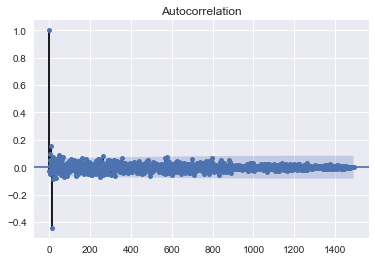

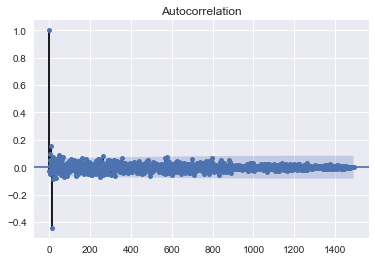

In [284]:
plot_acf(model.resid)

## VAR multivariate model

http://www.statsmodels.org/dev/vector_ar.html

http://www.pyflux.com/vector-autoregression/

In [64]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
import pyflux as pf

In [65]:
# drop any all 0 coins
df = df.loc[:, (df != 0).any(axis=0)]
some = df.iloc[:, :5]

In [66]:
# try to do the log using pct below... 

y = pf.VAR(data=some,lags=2,integ=1, target=data.BTC)
x = y.fit()
x.summary()

VAR(2)                                                                                                    
======================================================= ==================================================
Dependent Variable: Differenced BTC,Differenced ETH,Dif Method: OLS                                       
Start Date: 2017-08-21 07:00:00                         Log Likelihood: 26419.1206                        
End Date: 2017-11-12 01:00:00                           AIC: -52698.2412                                  
Number of observations: 1986                            BIC: -52306.6698                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Differenced BTC Constant                 -0.0       0.0003     -0.0156  0.9876   (-0.0006 | 0.0006)       
Differenced BTC AR(1)                

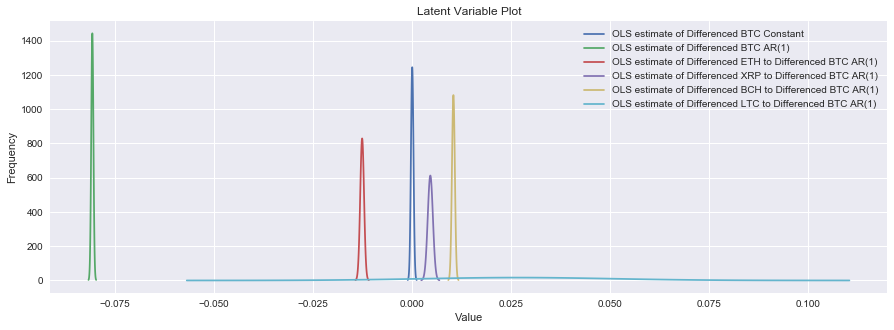

In [36]:
y.plot_z(list(range(0,6)),figsize=(15,5))

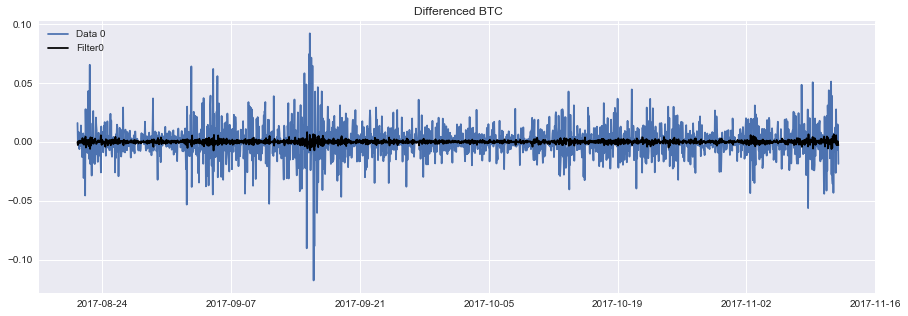

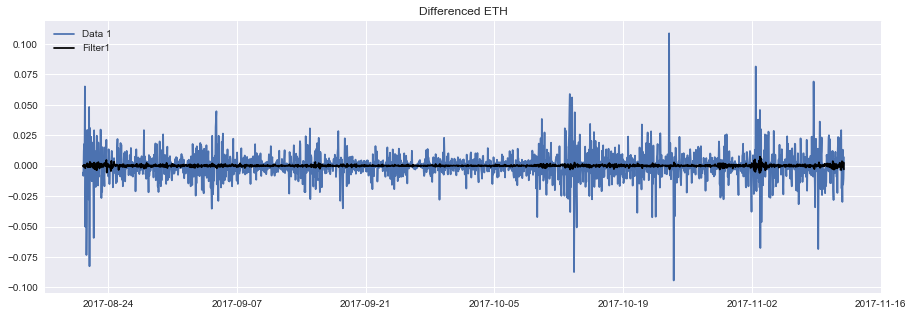

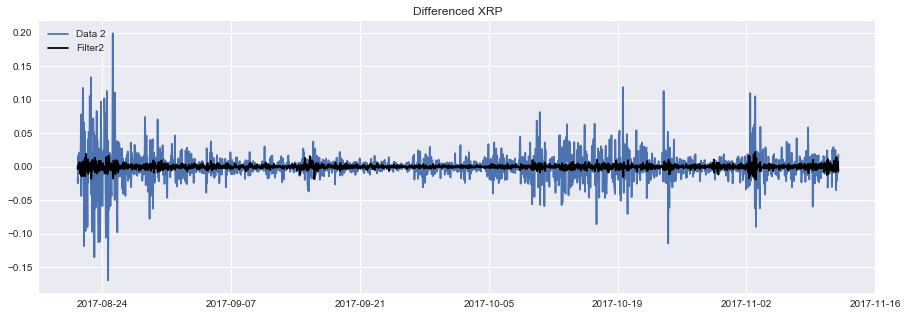

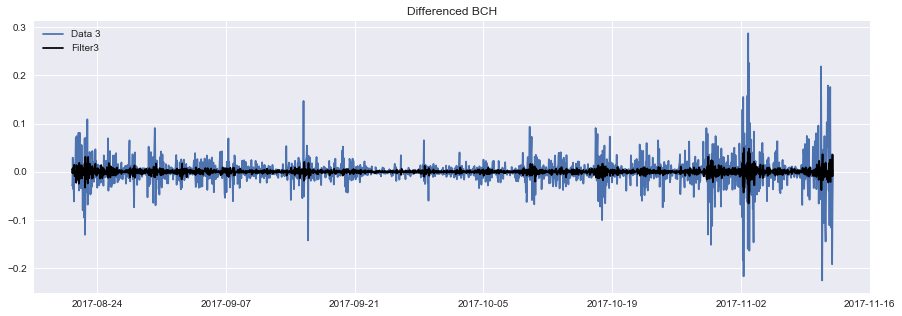

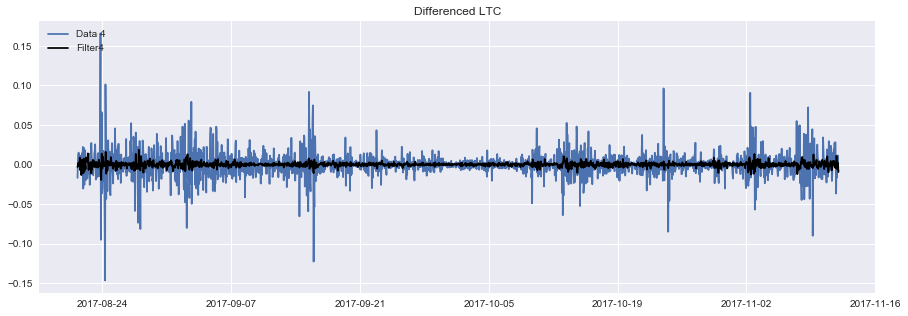

In [37]:
y.plot_fit(figsize=(15,5))

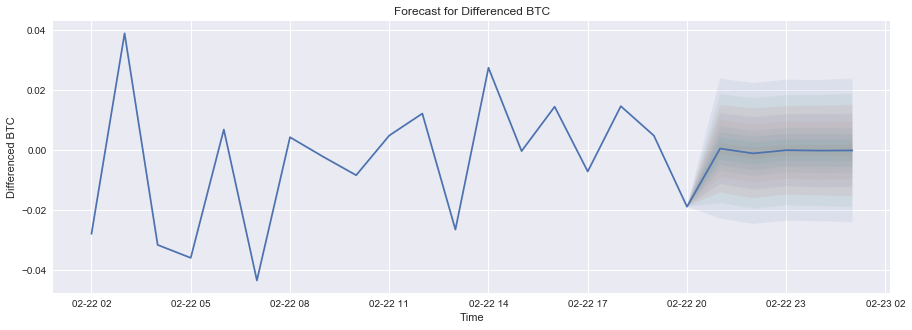

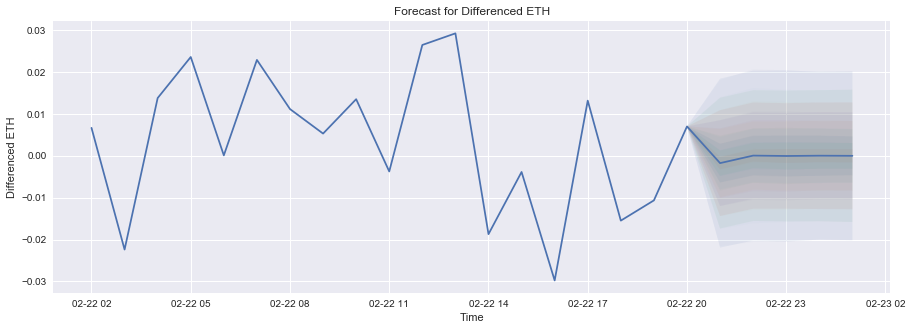

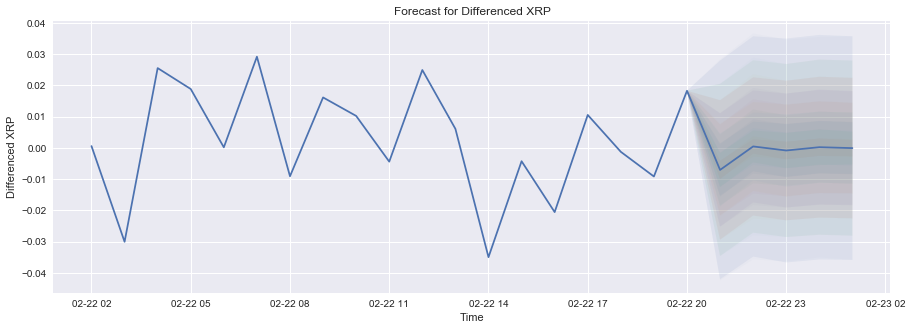

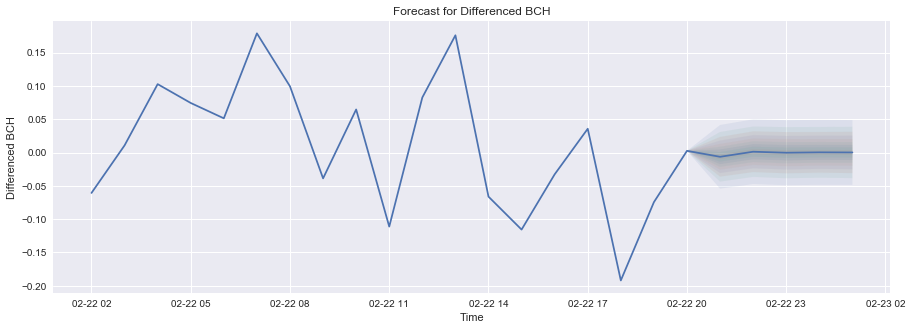

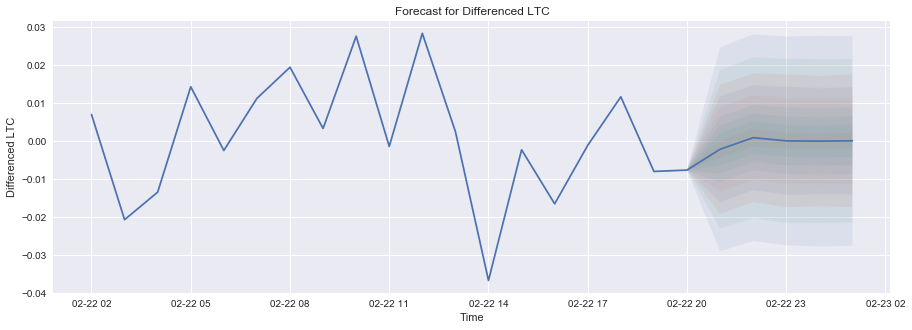

In [38]:
y.plot_predict(past_values=19,h=5,figsize=(15,5))


In [44]:
y.predict(h=6)

,Differenced BTC,Differenced ETH,Differenced XRP,Differenced BCH,Differenced LTC
time,,,,,
2076-12-31 20:00:00,0.000633,-0.001767,-0.007044,-0.006425,-0.002203
2076-12-31 21:00:00,-0.000988,0.000030,0.000468,0.001192,0.000846
2076-12-31 22:00:00,0.000080,-0.000063,-0.000836,-0.000303,0.000015
2076-12-31 23:00:00,-0.000053,0.000007,0.000227,0.000258,-0.000057
2077-01-01 00:00:00,0.000006,-0.000026,-0.000067,0.000090,0.000023
2077-01-01 01:00:00,-0.000005,-0.000013,0.000029,0.000104,0.000040


#### import numpy as np
import pyflux as pf
from pandas_datareader import data, wb
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

ibm = data.DataReader(['JPM','GS','BAC','C','WFC','MS'],  'yahoo', datetime(2012,1,1), datetime(2016,6,28))
opening_prices = np.log(ibm['Open'])
plt.figure(figsize=(15,5));
plt.plot(opening_prices.index,opening_prices);
plt.legend(opening_prices.columns.values,loc=3);
plt.title("Logged opening price");

In [55]:
opening_prices.index.dtype

dtype('<M8[ns]')

In [56]:
df.index.dtype

dtype('<M8[ns]')

In [51]:
model = pf.VAR(data=opening_prices, lags=2, integ=1)
x = model.fit()
x.summary()

VAR(2)                                                                                                    
======================================================= ==================================================
Dependent Variable: Differenced BAC,Differenced C,Diffe Method: OLS                                       
Start Date: 2016-06-27 00:00:00                         Log Likelihood: 21560.6252                        
End Date: 2012-01-03 00:00:00                           AIC: -42923.2505                                  
Number of observations: 1127                            BIC: -42425.5464                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Differenced BAC Constant                 -0.0008    0.0006     -1.4687  0.1419   (-0.002 | 0.0003)        
Differenced BAC AR(1)                

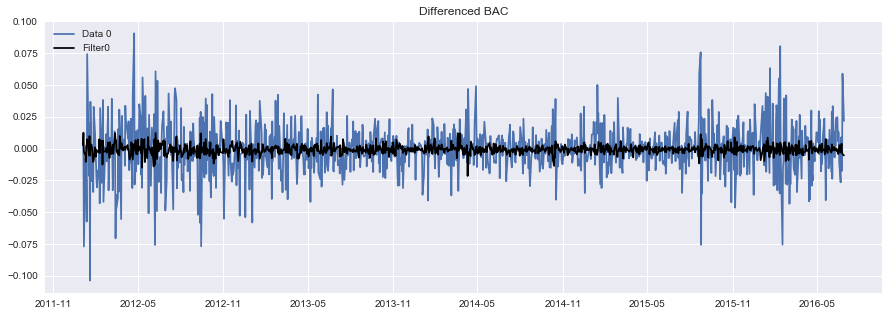

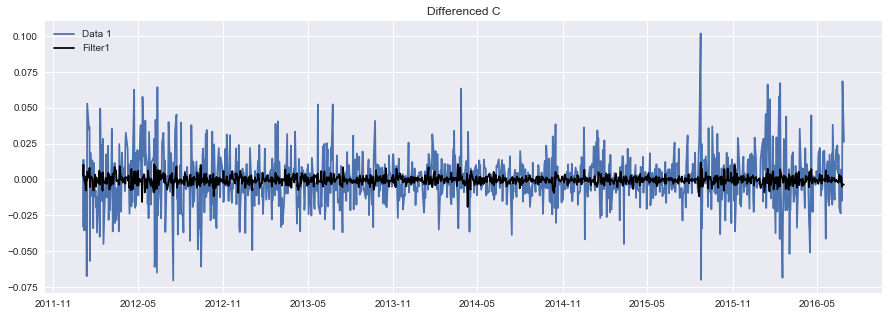

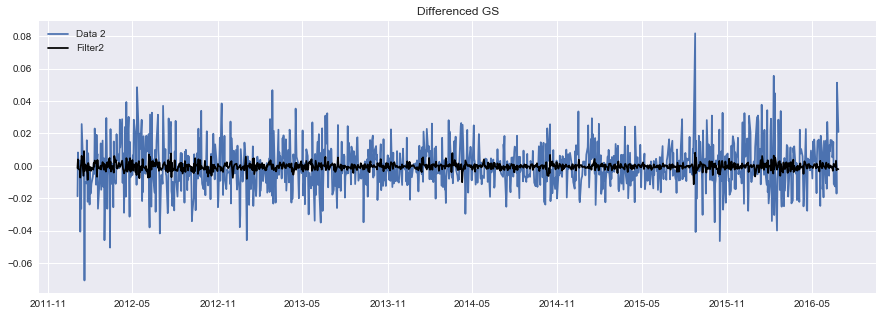

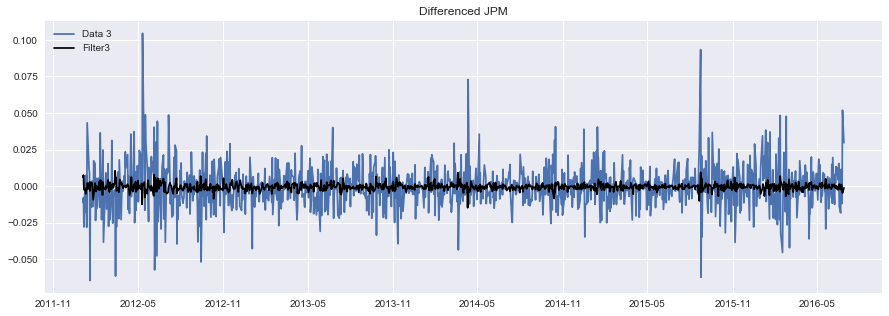

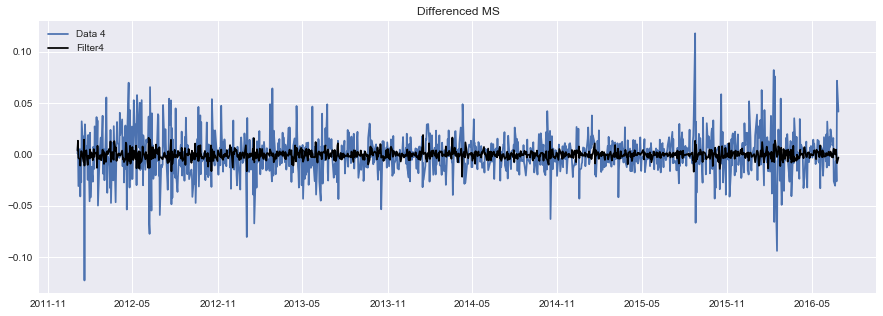

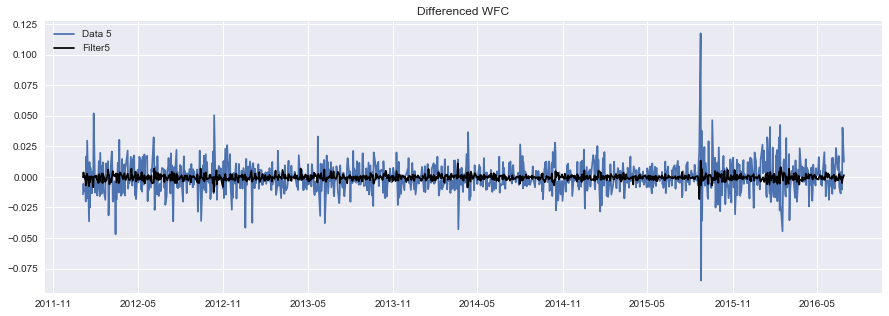

In [52]:
model.plot_fit(figsize=(15,5))